In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

2025-04-01 19:59:46.745211: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 19:59:46.746524: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 19:59:46.749983: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 19:59:46.759179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743537586.773924   22028 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743537586.77

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)  # (50000, 32, 32, 3) (10000, 32, 32, 3)


(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Split the training data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
# EDA: Display a few images with their class labels
def plot_sample_images():
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_train[i])
        plt.title(class_names[np.argmax(y_train[i])])
        plt.axis('off')
    plt.show()

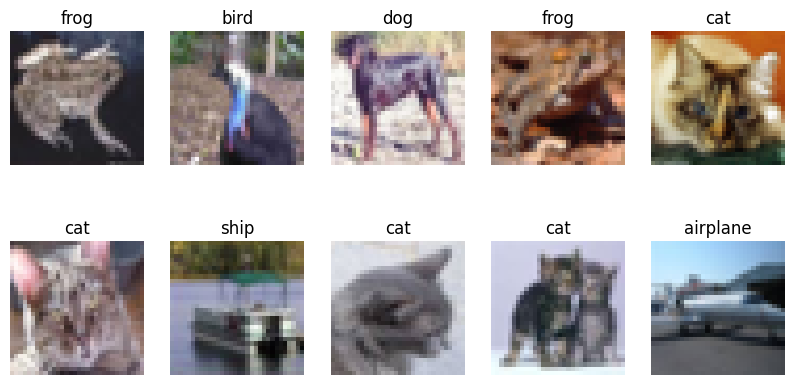

In [7]:
plot_sample_images()

In [8]:
# Define CNN model architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),  # Conv Layer 1
        MaxPooling2D((2,2)),  # Pooling 1
        Conv2D(64, (3,3), activation='relu', padding='same'),  # Conv Layer 2
        MaxPooling2D((2,2)),  # Pooling 2
        Conv2D(128, (3,3), activation='relu', padding='same'),  # Conv Layer 3
        MaxPooling2D((2,2)),  # Pooling 3
        Flatten(),  # Flatten feature maps
        Dense(256, activation='relu'),  # Fully connected layer
        Dropout(0.5),  # Dropout for regularization
        Dense(10, activation='softmax')  # Output layer with softmax
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [10]:
# Train the model
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, callbacks=[early_stop])


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 19:59:53.824588: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.3028 - loss: 1.8775 - val_accuracy: 0.5382 - val_loss: 1.2747
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5350 - loss: 1.2796 - val_accuracy: 0.6176 - val_loss: 1.0946
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6187 - loss: 1.0775 - val_accuracy: 0.6670 - val_loss: 0.9476
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6684 - loss: 0.9435 - val_accuracy: 0.6984 - val_loss: 0.8614
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7038 - loss: 0.8442 - val_accuracy: 0.7056 - val_loss: 0.8383
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7356 - loss: 0.7584 - val_accuracy: 0.7200 - val_loss: 0.7959
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7552 - loss: 0.6985 - val_accuracy: 0.7357 - val_loss: 0.7720
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.7745 - loss: 0.6447 - 

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7460 - loss: 0.7809
Test Accuracy: 0.7425


In [12]:
# Plot training and validation accuracy/loss over epochs
def plot_training_results(history):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

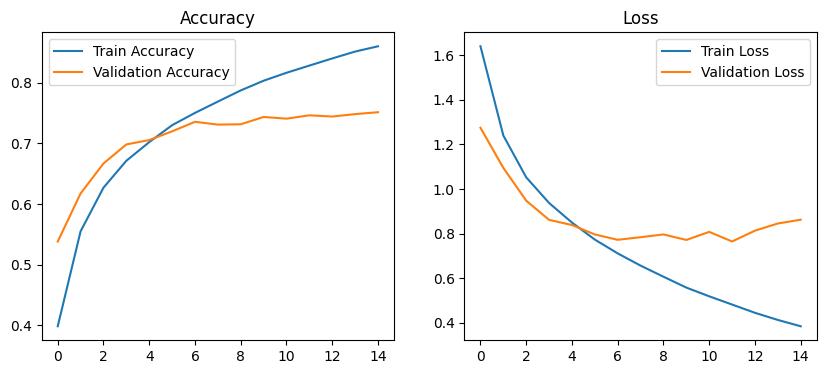

In [13]:
plot_training_results(history)

In [14]:
# Make predictions on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [15]:
# Print classification metrics
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.86      0.84      0.85      1000
           2       0.64      0.66      0.65      1000
           3       0.58      0.51      0.55      1000
           4       0.68      0.66      0.67      1000
           5       0.62      0.70      0.65      1000
           6       0.84      0.79      0.81      1000
           7       0.74      0.82      0.78      1000
           8       0.88      0.83      0.85      1000
           9       0.83      0.82      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



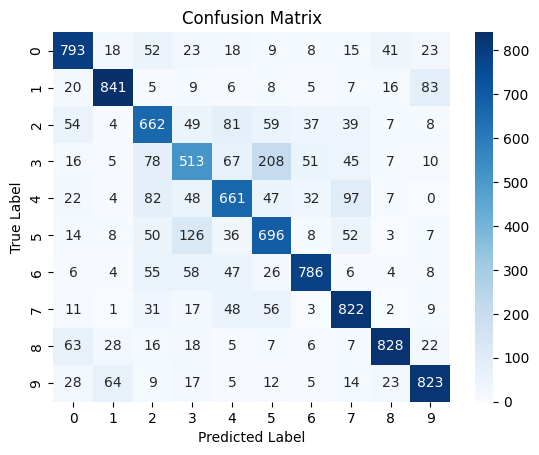

In [16]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()